## End of distribution imputation

- Replace missing data with value outside of the normal range (this is as an indicator (flag) that the corresponding value is missing).

- If the variable is normally distributed, value to impute = mean +- 3std

- If the variable is skewed, use IQR proximity rule, but *3 instead of * 1.5

- Or we can use the min/max value and multiply it by a factore, like 2 or 3

#### Assumptions

- Data is **not missing at random**

#### Advantages

- Fast way of obtaining complete datasets

- Automates arbitrary value imputation

- Highlight missing data

#### Disadvantages

- Distortion of the original variable distribution

- Distortion of the original variance

- Distortion of the covariance with the remaining variables in the dataset

- May mask true outliers in the distribution

#### Note

- This method used in financial companies. When captureing the financial history of customers, the missing data is replaced by a value at the end of the distribution to highlight that the values are missing.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3
RANDOM_STATE = 44

In [5]:
data = pd.read_csv("../data/titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [6]:
# proportion of na
data.isna().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [9]:
# split the data into train, test sets before any "learning", 
# getting statistical information from a dataset can be considered "learn"
# This is a good practice to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),
    data['survived'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((916, 2), (393, 2))

<Axes: >

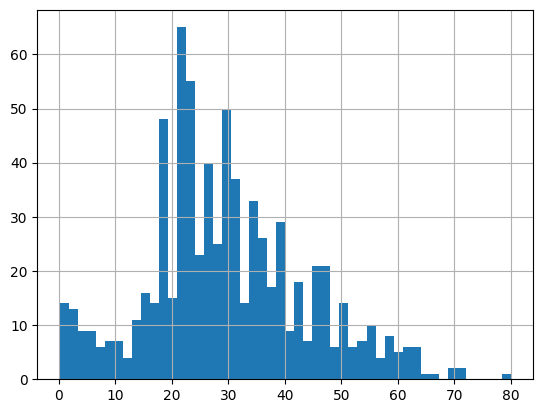

In [11]:
# Distribution of age
X_train['age'].hist(bins=50)

In [13]:
# Age looks approximately Gaussian, so use mean and std to calc imputation value
imp_val = X_train['age'].mean() + 3 * X_train['age'].std()
imp_val

np.float64(72.35262150438666)

In [14]:
X_train['age_imputed'] = X_train['age'].fillna(imp_val)
X_train.head(15)

,age,fare,age_imputed
689,22.00,7.2500,22.000000
376,24.00,10.5000,24.000000
658,0.75,19.2583,0.750000
255,24.00,69.3000,24.000000
549,3.00,18.7500,3.000000
1049,20.00,15.7417,20.000000
723,31.00,7.7333,31.000000
568,18.50,13.0000,18.500000
1268,NaN,9.5000,72.352622
266,56.00,26.5500,56.000000


In [15]:
# See the change in variance before and after applying end_tail_imputation
print("Variance before: ", X_train['age'].var())
print("Variance after: ", X_train['age_imputed'].var())

Variance before:  201.87433431318317
Variance after:  443.357600939744


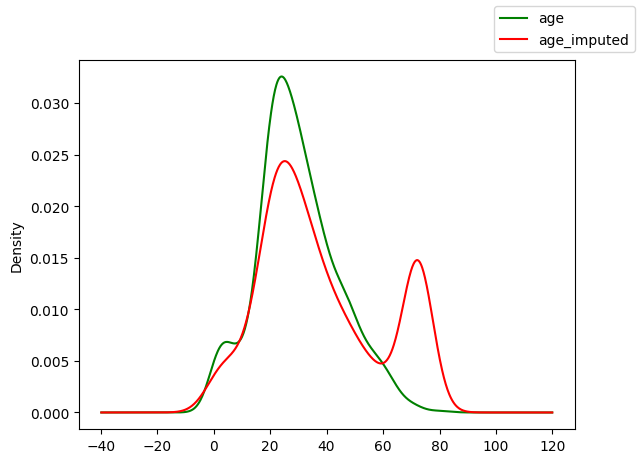

In [16]:
# See the change in distribution
fig, ax = plt.subplots()
X_train['age'].plot(kind="kde", ax=ax, color="green")
X_train['age_imputed'].plot(kind="kde", ax=ax, color="red")
fig.legend()

This technique distorts the original distribution of the variable age. The transformed variable shows more values around the selected tail value.

- For linear models, this distortion may affect the quality of the models as one assumption for that kind of model is the variables should normally distributed.

- This techniques may not affect tree-based models.

In [17]:
# This technique may affect the relationship 
# with other vars too.
X_train[["fare", "age", "age_imputed"]].cov()

,fare,age,age_imputed
fare,2881.253629,141.005360,20.048418
age,141.005360,201.874334,201.874334
age_imputed,20.048418,201.874334,443.357601


<Axes: >

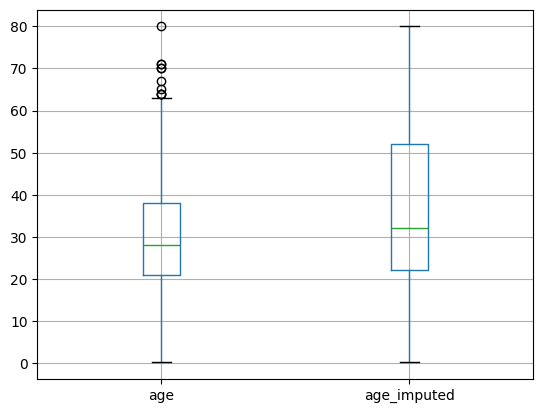

In [18]:
# This technique may mask the outlier as well
X_train[["age", "age_imputed"]].boxplot()